In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'https://raw.githubusercontent.com/HojatS/StockPred/main/data.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None
  Company        Date Close/Last    Volume     Open       High      Low
0    AAPL  07/17/2023    $193.99  50520160  $191.90    $194.32  $191.81
1    AAPL  07/14/2023    $190.69  41616240  $190.23  $191.1799  $189.63
2    AAPL  07/13/2023    $190.54  41342340  $190.50    $191.19  $189.78
3    AAPL  07-12-2023    $189.77  60750250  $189.68    $191.70  $188.47
4    AAPL  07-11-2023    $188.08  46638120  $189.16    $189.30  $186.60


In [11]:
# Check for exact duplicate rows
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [12]:
# Check for missing values
potential_missing_values = data.isin([0]).sum()
print("Potential missing values (zeros in columns):")
print(potential_missing_values)

Potential missing values (zeros in columns):
Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [13]:
# Convert the 'Date' column to a consistent datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Remove the '$' sign and convert the financial columns to float
financial_cols = ['Close/Last', 'Open', 'High', 'Low']
data[financial_cols] = data[financial_cols].replace('[\$,]', '', regex=True).astype(float)

# Save the changes by overwriting the original file
data.to_csv(file_path, index=False)

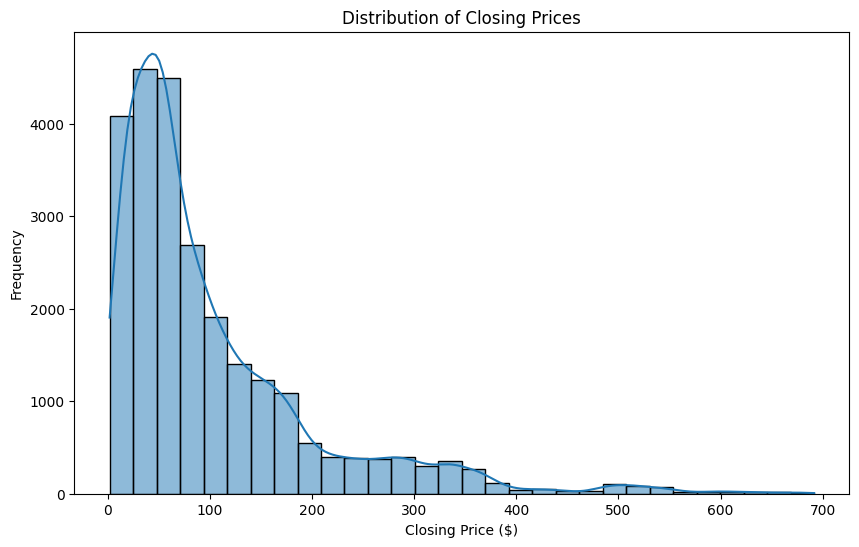

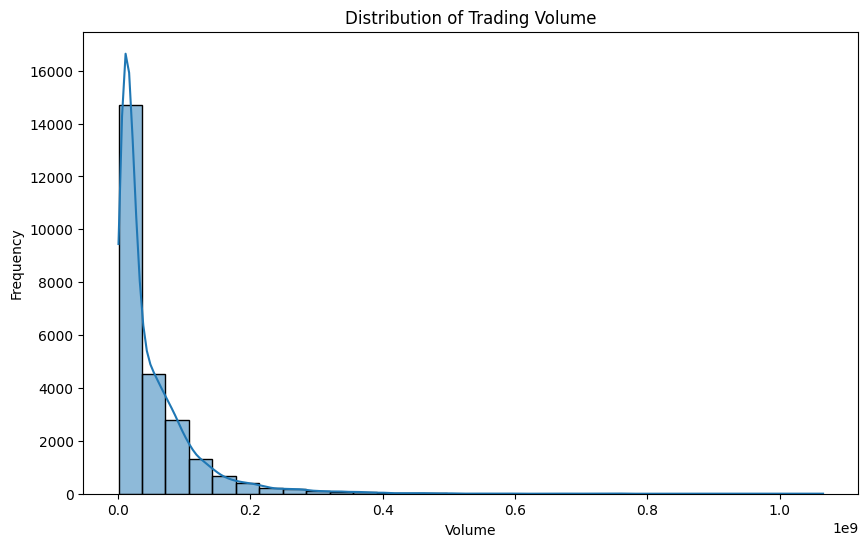

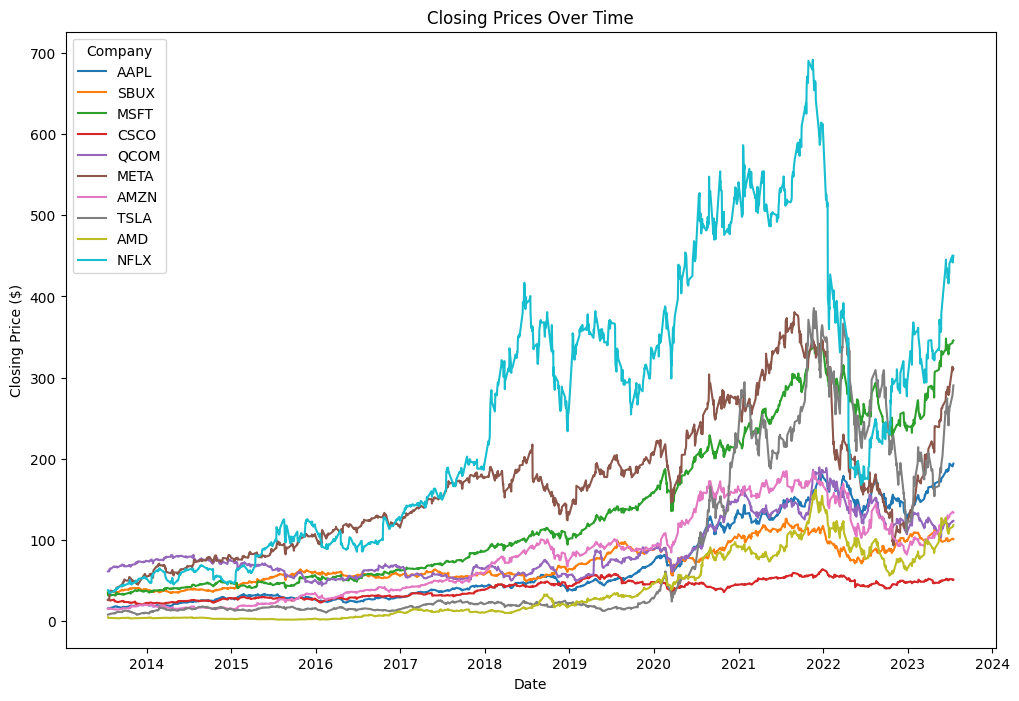

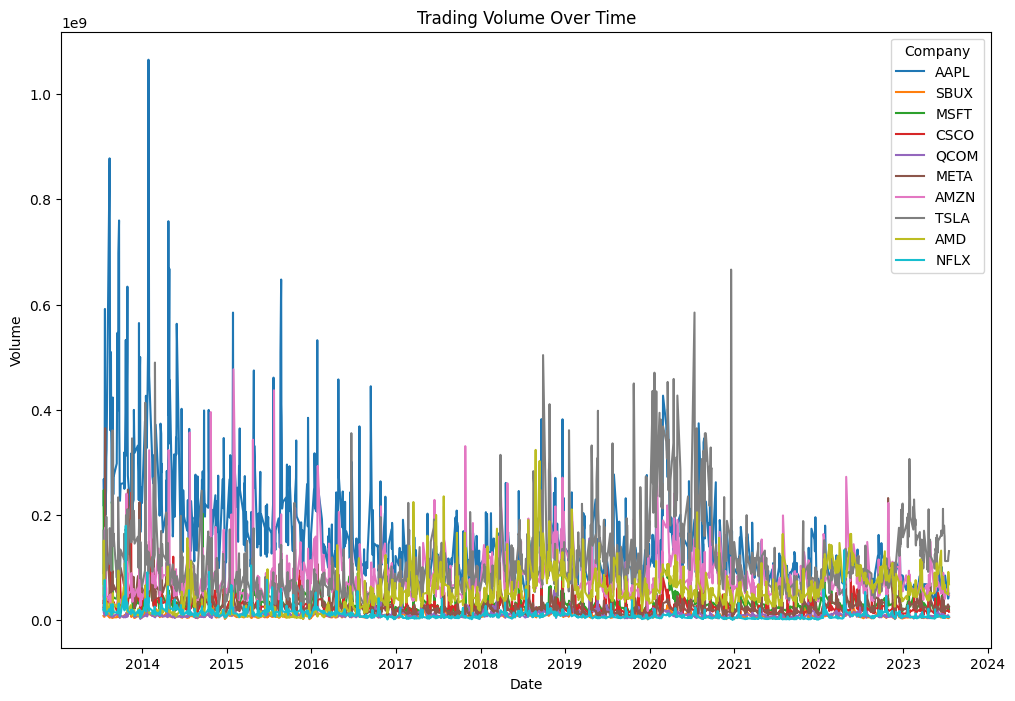

In [14]:
# Distribution of closing prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Close/Last'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price ($)')
plt.ylabel('Frequency')
plt.show()

# Distribution of volumes
plt.figure(figsize=(10, 6))
sns.histplot(data['Volume'], bins=30, kde=True)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

# Closing prices over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Close/Last', hue='Company', data=data)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.show()

# Trading volume over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Volume', hue='Company', data=data)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


In [15]:
# Pivot data for correlation analysis
pivot_data = data.pivot(index='Date', columns='Company', values='Close/Last')

# Calculate the correlation matrix
correlation_matrix = pivot_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix of Closing Prices Between Companies')
plt.show()

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
# Calculate price growth
initial_prices = pivot_data.iloc[0]
final_prices = pivot_data.iloc[-1]
price_growth = ((final_prices - initial_prices) / initial_prices) * 100

# Calculate average trading volume and format it as a string with "millions"
average_volume_formatted = data.groupby('Company')['Volume'].mean().apply(lambda x: f"{x / 1e6:.2f} million shares")

# Combine into a DataFrame with formatted volumes
top_performers_formatted = pd.DataFrame({
    'Price Growth (%)': price_growth,
    'Average Volume': average_volume_formatted
}).sort_values(by='Price Growth (%)', ascending=False)

print(top_performers_formatted)

In [ ]:
# Calculate volatility
volatility = pivot_data.std()

# Calculate average trading volume and format it as a string with "millions"
average_volume_formatted = data.groupby('Company')['Volume'].mean().apply(lambda x: f"{x / 1e6:.2f} million shares")

# Combine into a DataFrame with formatted volumes
volatility_analysis_formatted = pd.DataFrame({
    'Volatility (Std Dev)': volatility,
    'Average Volume': average_volume_formatted
}).sort_values(by='Volatility (Std Dev)', ascending=False)

print(volatility_analysis_formatted)